## Linear Classification

In the case of linear regression, a prediction is made using this formula:

    ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

The formula is very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero.  If the function is smaller than zero, we predict the class -1.  If the function is larger than zero, we predict the class +1.  This prediction rule is common to all linear models for
classification.

For linear models for regression, the output ŷ is a linear function of the features: a line, plane, or hyperplane.  The *decision boundary* is a linear function of the input.  

Linear classification algorithms mainly differ in the following 2 ways:
- The way they measure how well a particular combination of coefficients fits the training data
- If and what kind of regularization they use

### LogisticRegression and LinearSVMs

The two most common linear classification algorithms are *Logistic Regression* and *Linear SVMs* (*aka Linear SVCs for Support Vector Classifiers*).  We can apply both models to the *forge* dataset, and visualize the decision boundary as found by the linear models.

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

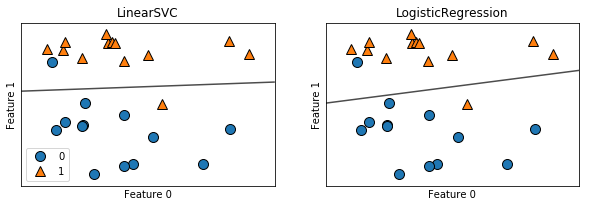

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

By default, both models apply *L2 regularization*, in the same way the *Ridge* does for regression.  The trade-off parameter that determines the strength of the regularization is called *C*, and higher values of *C* correspond to less regularization.

When higher values of *C* are used, *LogisticRegression* and *LinearSVC* try to fit the training set as best as possible.  With low values of *C*, the models put more emphasis on finding a coefficient vector that is close to 0.

The other interesting aspect of how *C* works is that using low values of *C* will cause the algorithm to try to adjust to the majority of data points.  A higher value of *C* stresses the importance that each individual data point gets classified correctly.

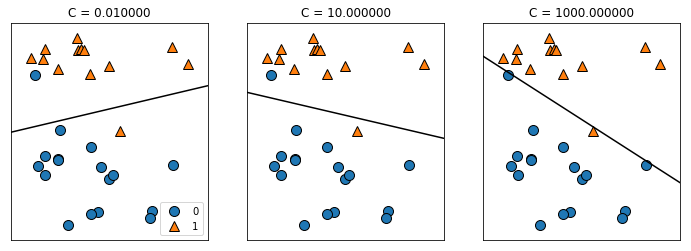

In [4]:
# Linear SVC with different C values
mglearn.plots.plot_linear_svc_regularization()

### Logistic Regression

Now, we analyze *LogisticRegression* in more detail on the Breast Cancer dataset.

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


The default value of *C=1* provides quite good performance, with 95% accuracy on both the training and test sets.  But since the training and test set scores are very close, it is likely we are underfitting.

In [6]:
# Increase C to fit a more flexible model
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


Using *C=100* results in higher training set accuracy, and also a slightly increased test set accuracy.  This confirmns our intuition that a more complex model should perform better.

In [7]:
# Decrease C to use a more regularized model
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


As expected, when moving more to the left from an already underfit model, both training and test set accuracy decrease relative to the default parameters.

Finally, we look at the coefficients learned by the models with the 3 different settings of the regularization parameter *c*.

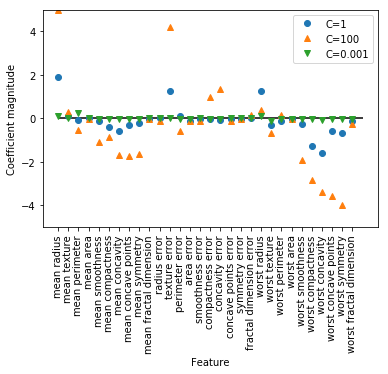

In [8]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we desire a more interpretable model, using *L1 Regularization* might help, as it limits the model to using only a few features.  Here is the coefficient plot and classification accuracies for L1 regularization:

Training accuracy of L1 logreg with C=0.001: 0.91
Test accuracy of L1 logreg with C=0.001: 0.92

Training accuracy of L1 logreg with C=1.000: 0.96
Test accuracy of L1 logreg with C=1.000: 0.96

Training accuracy of L1 logreg with C=100.000: 0.99
Test accuracy of L1 logreg with C=100.000: 0.98



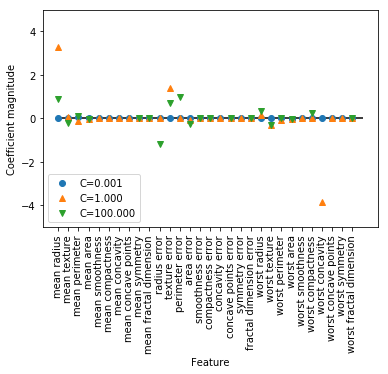

In [10]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of L1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of L1 logreg with C={:.3f}: {:.2f}\n".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)